# Load Data

In [762]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [763]:
data = pd.read_csv('../data/salary_data.csv')

# Análisis de características

## NANs

In [764]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [765]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [766]:
data.duplicated().sum()

np.int64(4912)

In [767]:
# Eliminacion de nulls y duplicados
data.dropna(inplace=True)
# data.drop_duplicates(inplace=True)

Eliminamos los valores de salario menores que 25000 ya que como se puede apreciar parecen valores erroneos.

In [768]:
data[data["Salary"] < 25000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0


In [769]:
data = data.loc[data["Salary"] >= 25000]

In [770]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Age

In [771]:
data["Age"].describe()

count    6694.000000
mean       33.626979
std         7.615945
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64

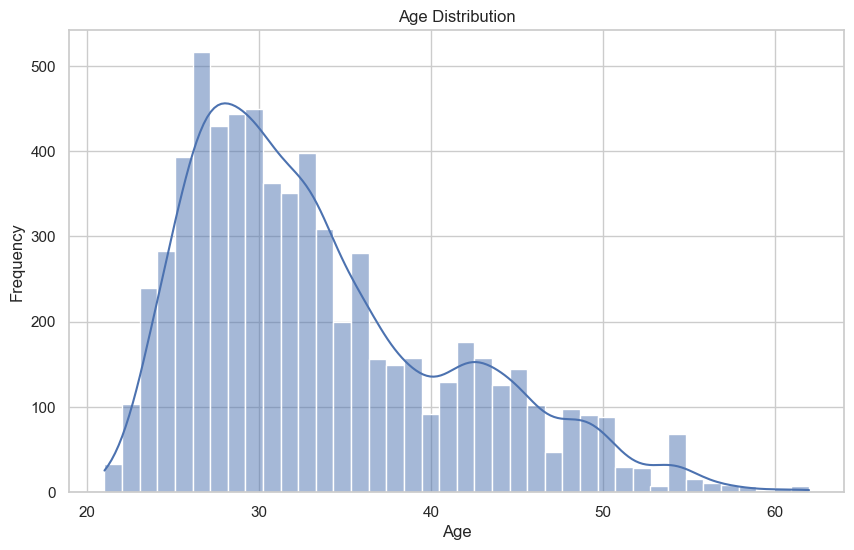

In [772]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Age"], bins=40, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

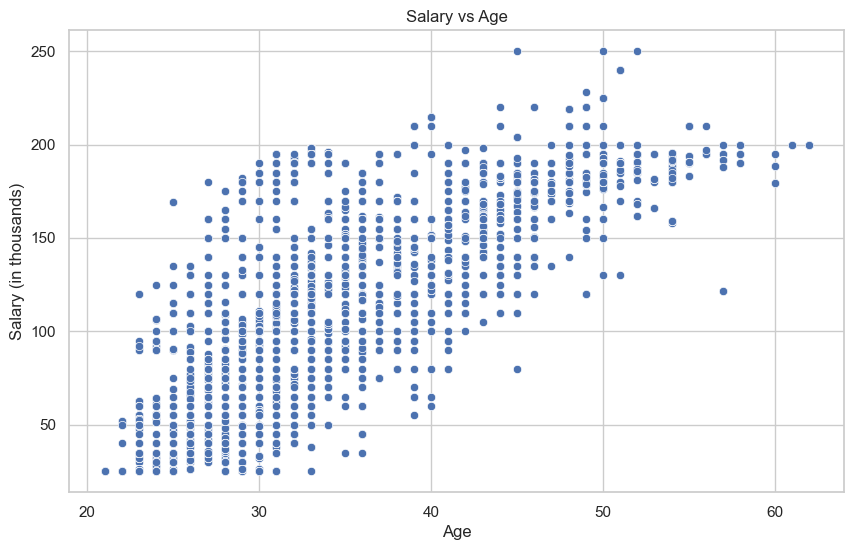

In [773]:
# Hacemos un plot de la relacion que tinen la columna Age con Salary
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Age"], y=data["Salary"] / 1000)
plt.ylabel("Salary (in thousands)")
plt.title("Salary vs Age")
plt.show()

## Gender

- Género

In [774]:
data["Gender"].value_counts()

Gender
Male      3669
Female    3011
Other       14
Name: count, dtype: int64

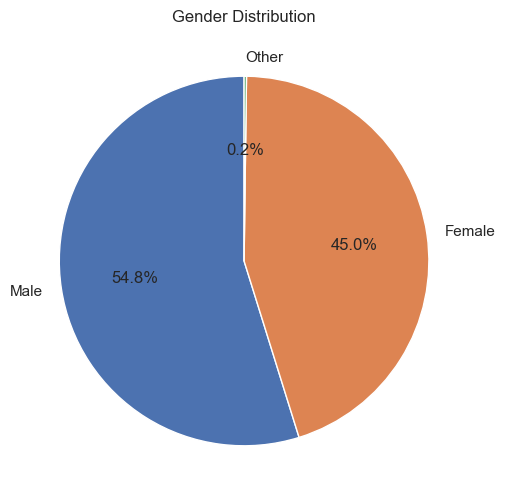

In [775]:
plt.figure(figsize=(10, 6))
plt.pie(data["Gender"].value_counts(), labels=data["Gender"].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

### One Hot Encodig

Realizamos one hot encodig de los tipos

In [776]:
# Hacemos one hot encoding con get dummies
data = pd.get_dummies(data, columns=["Gender"])

In [777]:
data.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,False,True,False
1,28.0,Master's,Data Analyst,3.0,65000.0,True,False,False
2,45.0,PhD,Senior Manager,15.0,150000.0,False,True,False
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,True,False,False
4,52.0,Master's,Director,20.0,200000.0,False,True,False


## Education Level

- [ ] Quizá haya que unificar categorias ["Bachelor's" y "Bachelor's Degree"] y ["Master's" y "Master's Degree"]

In [778]:
data["Education Level"].value_counts()

Education Level
Bachelor's Degree    2263
Master's Degree      1572
PhD                  1367
Bachelor's            755
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

`PhD` aparece como `phD` y `PhD`. Agrupamos ambos en `PhD`

In [779]:
data.loc[data["Education Level"] == "phD", "Education Level"] = "PhD"

In [780]:
data["Education Level"].value_counts()

Education Level
Bachelor's Degree    2263
Master's Degree      1572
PhD                  1368
Bachelor's            755
High School           448
Master's              288
Name: count, dtype: int64

C:\Users\pablo\AppData\Local\Temp\ipykernel_21740\2053585529.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education Level", y="Salary", data=data, order=edu_order, palette="pastel")


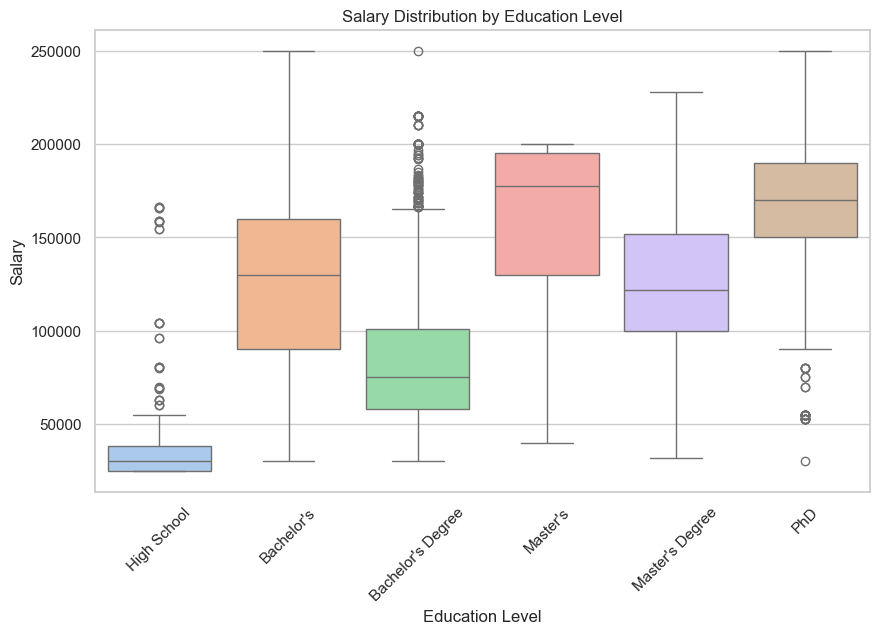

In [781]:
# Definir el orden de los niveles de educación de menor a mayor dificultad
edu_order = ["High School", "Bachelor's", "Bachelor's Degree", "Master's", "Master's Degree", "PhD"]

# Asegurar que la columna 'Education Level' es categórica y ordenada
data["Education Level"] = pd.Categorical(data["Education Level"], categories=edu_order, ordered=True)

# Crear el gráfico de caja con el nuevo orden
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education Level", y="Salary", data=data, order=edu_order, palette="pastel")
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.show()


### One-hot Encodig

In [782]:
data = pd.get_dummies(data, columns=["Education Level"])

In [783]:
data.head()

,Age,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other,Education Level_High School,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD
0,32.0,Software Engineer,5.0,90000.0,False,True,False,False,True,False,False,False,False
1,28.0,Data Analyst,3.0,65000.0,True,False,False,False,False,False,True,False,False
2,45.0,Senior Manager,15.0,150000.0,False,True,False,False,False,False,False,False,True
3,36.0,Sales Associate,7.0,60000.0,True,False,False,False,True,False,False,False,False
4,52.0,Director,20.0,200000.0,False,True,False,False,False,False,True,False,False


## Job Title

In [784]:
data["Job Title"].value_counts()

Job Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             375
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Business Operations Analyst      1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1
Social Media Man                        1
Name: count, Length: 191, dtype: int64

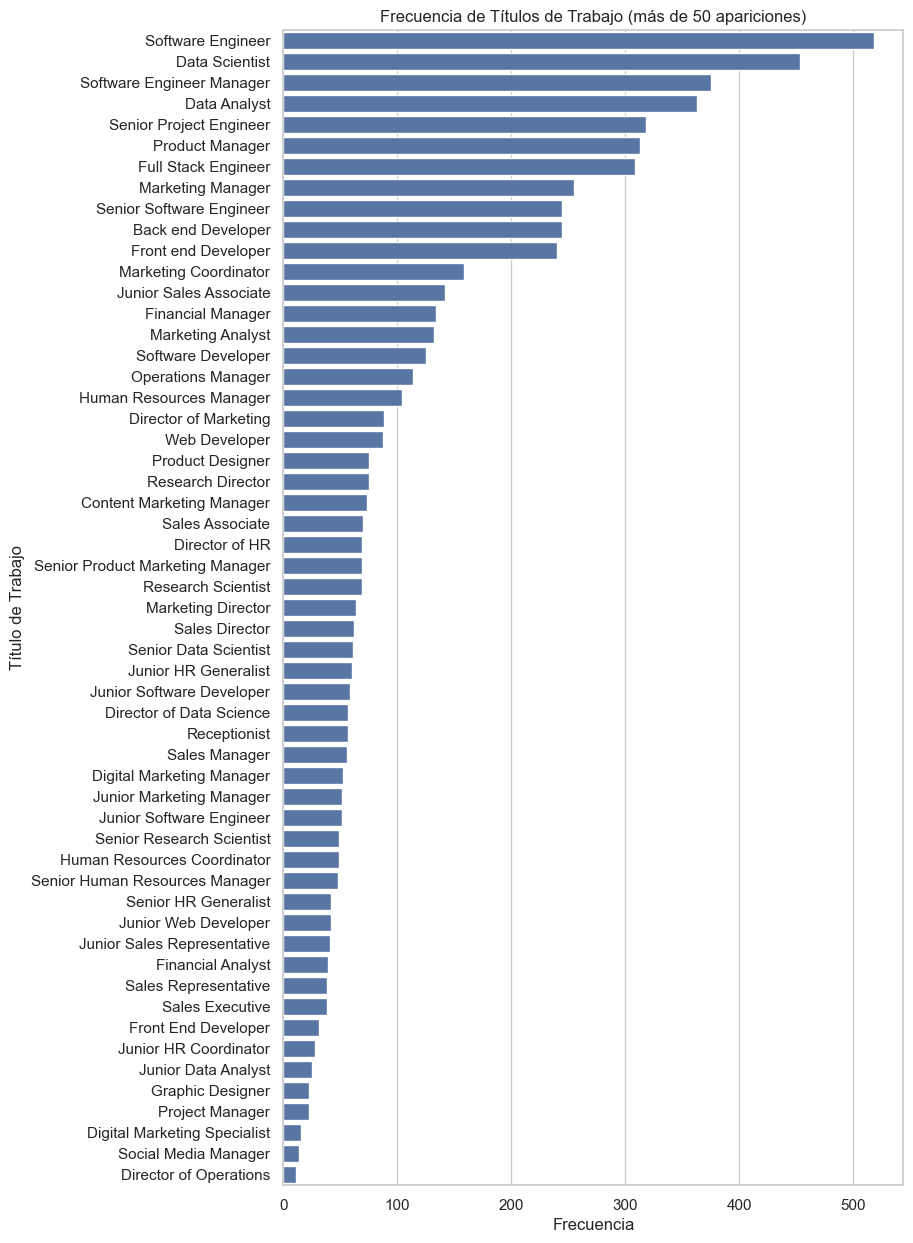

In [785]:
# Filtrar los títulos de trabajo que aparecen más de un cierto umbral (por ejemplo, 50 veces)
job_title_counts = data["Job Title"].value_counts()
filtered_job_titles = job_title_counts[job_title_counts > 10]

# Crear el gráfico de barras
plt.figure(figsize=(8, 15))
sns.barplot(x=filtered_job_titles.values, y=filtered_job_titles.index)
plt.title("Frecuencia de Títulos de Trabajo (más de 50 apariciones)")
plt.xlabel("Frecuencia")
plt.ylabel("Título de Trabajo")
plt.show()

In [786]:
print(list(data["Job Title"].value_counts().index))
print(len(list(data["Job Title"].value_counts().index)))

['Software Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Senior Project Engineer', 'Product Manager', 'Full Stack Engineer', 'Marketing Manager', 'Senior Software Engineer', 'Back end Developer', 'Front end Developer', 'Marketing Coordinator', 'Junior Sales Associate', 'Financial Manager', 'Marketing Analyst', 'Software Developer', 'Operations Manager', 'Human Resources Manager', 'Director of Marketing', 'Web Developer', 'Product Designer', 'Research Director', 'Content Marketing Manager', 'Sales Associate', 'Director of HR', 'Senior Product Marketing Manager', 'Research Scientist', 'Marketing Director', 'Sales Director', 'Senior Data Scientist', 'Junior HR Generalist', 'Junior Software Developer', 'Director of Data Science', 'Receptionist', 'Sales Manager', 'Digital Marketing Manager', 'Junior Marketing Manager', 'Junior Software Engineer', 'Senior Research Scientist', 'Human Resources Coordinator', 'Senior Human Resources Manager', 'Senior HR Generalist',

### División "Job Title" en "Job Title" y "Seniority"

In [787]:
print(len(list(data["Job Title"].value_counts().index)))

191


In [788]:
def categorize_job_title(title):
    """
    Clasifica un título de trabajo (job title) en varias categorías
    según las palabras clave encontradas.
    """
    # Convertimos a minúsculas y quitamos espacios innecesarios
    normalized_title = title.lower().strip()

    # Senior (ej. "Senior Software Engineer", "Lead Developer", "Principal Scientist")
    if (normalized_title.startswith('senior') or
        'sr ' in normalized_title or
        'lead' in normalized_title or
        'principal' in normalized_title):
        return 'Senior'

    # Junior (ej. "Junior Developer", "Jr Analyst", "Entry-level Consultant")
    elif (normalized_title.startswith('junior') or
          'jr ' in normalized_title or
          'entry-level' in normalized_title):
        return 'Junior'

    # Director (ej. "Director of Marketing", "Head of Sales", "Chief Data Officer", "VP", "CEO")
    elif ('director' in normalized_title or
          'chief' in normalized_title or
          'head of' in normalized_title or
          'vice president' in normalized_title or
          'vp' in normalized_title or
          'ceo' in normalized_title or
          'cto' in normalized_title or
          'coo' in normalized_title):
        return 'Director'
    
    # Manager / Supervisor (ej. "Manager", "Supervisor", "Team Lead" - si no lo trataste como 'Senior')
    elif ('manager' in normalized_title or
          'supervisor' in normalized_title):
        return 'Manager'
    
    # Engineer (ej. "Software Engineer", "Data Engineer")
    elif 'engineer' in normalized_title:
        return 'Engineer'
    
    # Developer (ej. "Software Developer", "Web Developer")
    elif 'developer' in normalized_title:
        return 'Developer'
    
    # Analyst (ej. "Data Analyst", "Business Analyst", "Financial Analyst")
    elif 'analyst' in normalized_title:
        return 'Analyst'
    
    # Specialist (ej. "IT Specialist", "Marketing Specialist")
    elif 'specialist' in normalized_title:
        return 'Specialist'
    
    # Consultant (ej. "IT Consultant", "Business Consultant")
    elif 'consultant' in normalized_title:
        return 'Consultant'
    
    # Scientist (ej. "Data Scientist", "Research Scientist")
    elif 'scientist' in normalized_title:
        return 'Scientist'
    
    # Associate (ej. "Sales Associate", "Business Development Associate")
    elif 'associate' in normalized_title:
        return 'Associate'
    
    # Coordinator (ej. "Project Coordinator", "HR Coordinator")
    elif 'coordinator' in normalized_title:
        return 'Coordinator'
    
    # Si ninguna de las categorías anteriores coincide, lo marcamos como "Regular" u "Other"
    else:
        return 'Regular'


data['Seniority'] = data['Job Title'].apply(categorize_job_title)
data['Job Title'] = data['Job Title'].str.replace('Senior', '').str.replace('Junior', '').str.strip()

In [789]:
print(len(list(data["Job Title"].value_counts().index)))

129


In [790]:
data["Seniority"].value_counts()

Seniority
Manager       1527
Senior         967
Engineer       828
Developer      727
Director       658
Junior         571
Analyst        540
Scientist      522
Regular        263
Associate       70
Specialist      20
Consultant       1
Name: count, dtype: int64

### Label Encodig

In [791]:
# from sklearn.preprocessing import LabelEncoder

# Job Title Label Encoding
data['Job Title'] = data['Job Title'].astype('category').cat.codes

# Seniarity Label Encoding
data['Seniority'] = data['Seniority'].astype('category').cat.codes


### Eliminamos trabajos con menos de 20 ocurrencias

In [792]:
# Filter out job titles that appear less than 10 times
job_title_counts = data['Job Title'].value_counts()
job_titles_to_keep = job_title_counts[job_title_counts >= 20].index

# Keep only the rows with job titles that appear at least 10 times
data = data[data['Job Title'].isin(job_titles_to_keep)]

row_count = len(data)
print(f'The number of rows in the data is: {row_count}')

The number of rows in the data is: 6481


In [793]:

# Keep only the rows with job titles that appear at least 10 times
data_cleaned = data[data['Job Title'].isin(job_titles_to_keep)]

row_count = len(data_cleaned)
print(f'The number of rows in the data is: {row_count}')

The number of rows in the data is: 6481


In [794]:

job_titles_to_keep = job_title_counts[job_title_counts >= 20].index

# Keep only the rows with job titles that appear at least 10 times
data_cleaned = data_cleaned[data_cleaned['Job Title'].isin(job_titles_to_keep)]

row_count = len(data_cleaned)
print(f'The number of rows in the data is: {row_count}')

The number of rows in the data is: 6481


## Years of Experience

In [795]:
data["Years of Experience"].describe()


count    6481.000000
mean        8.073831
std         6.025357
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        34.000000
Name: Years of Experience, dtype: float64

<Axes: xlabel='Years of Experience', ylabel='Count'>

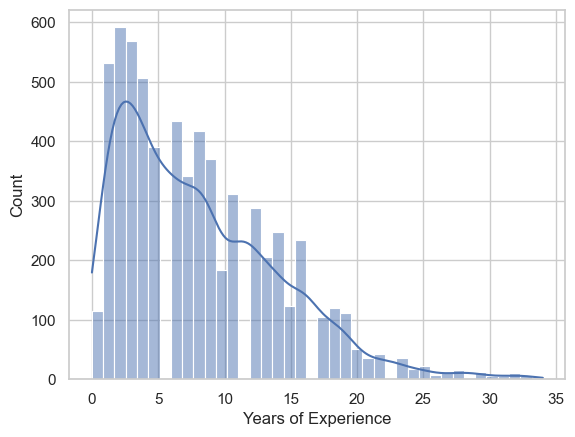

In [796]:
sns.histplot(data["Years of Experience"], bins=40, kde=True)

<Axes: xlabel='Years of Experience', ylabel='Salary'>

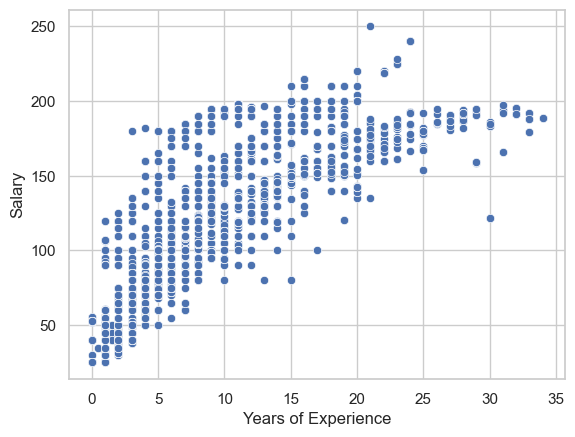

In [797]:
sns.scatterplot(x=data["Years of Experience"], y=data["Salary"] / 1000)

## Salary

In [798]:
data["Salary"].value_counts()

Salary
140000.0    281
120000.0    272
160000.0    270
55000.0     234
60000.0     222
           ... 
137000.0      1
127000.0      1
68000.0       1
250000.0      1
228000.0      1
Name: count, Length: 439, dtype: int64

# Save Dataset

In [799]:
# Reemplazar True con 1 y False con 0
data = data.replace({True: 1, False: 0})
data.to_csv('../data/salary_data_clean_pablo.csv', index=False)

C:\Users\pablo\AppData\Local\Temp\ipykernel_21740\819548777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})
